In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd
import numpy as np
from math import sqrt
from tqdm import tqdm_notebook as tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Dataset 불러오기

In [3]:
path = './movielens_data/'
ratings_df = pd.read_csv(os.path.join(path, 'ratings.csv'), encoding='utf-8')

In [4]:
print(ratings_df.shape)
print(ratings_df.head())

(100836, 4)
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [5]:
train_df, test_df = train_test_split(ratings_df, test_size=0.2, random_state=1234)

In [6]:
print(train_df.shape)
print(test_df.shape)

(80668, 4)
(20168, 4)


### Sparse Matrix 만들기

In [7]:
sparse_matrix = train_df.groupby('movieId').apply(lambda x: pd.Series(x['rating'].values, index=x['userId'])).unstack()
sparse_matrix.index.name = 'movieId'

In [8]:
sparse_matrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,NaN,2.5,NaN,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,NaN,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# fill sparse matrix with average of movie ratings
sparse_matrix_withmovie = sparse_matrix.apply(lambda x: x.fillna(x.mean()), axis=1)

# fill sparse matrix with average of user ratings
sparse_matrix_withuser = sparse_matrix.apply(lambda x: x.fillna(x.mean()), axis=0)

In [10]:
sparse_matrix_withmovie.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,3.893491,3.893491,3.893491,3.893491,4.000000,3.893491,4.500000,3.893491,3.893491,3.893491,...,4.000000,3.893491,4.000000,3.000000,4.000000,2.500000,3.893491,2.500000,3.893491,5.000000
2,3.396341,3.396341,3.396341,3.396341,3.396341,3.396341,3.396341,4.000000,3.396341,3.396341,...,3.396341,4.000000,3.396341,3.396341,3.500000,3.396341,3.396341,2.000000,3.396341,3.396341
3,4.000000,3.454545,3.454545,3.454545,3.454545,5.000000,3.454545,3.454545,3.454545,3.454545,...,3.454545,3.454545,3.454545,3.454545,3.454545,3.454545,3.454545,3.454545,3.454545,3.454545
4,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,...,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000,2.250000
5,3.039474,3.039474,3.039474,3.039474,3.039474,5.000000,3.039474,3.039474,3.039474,3.039474,...,3.039474,3.039474,3.039474,3.039474,3.039474,3.039474,3.039474,3.039474,3.039474,3.039474


In [11]:
sparse_matrix_withuser.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.320652,3.94,2.516667,3.631868,4.000000,3.504132,4.500000,3.486486,3.1,3.292035,...,4.000000,3.473684,4.000000,3.000000,4.000000,2.500000,3.772414,2.500000,3.275862,5.000000
2,4.320652,3.94,2.516667,3.631868,3.636364,3.504132,3.247967,4.000000,3.1,3.292035,...,4.396104,4.000000,3.494024,3.486842,3.500000,3.649718,3.772414,2.000000,3.275862,3.678709
3,4.000000,3.94,2.516667,3.631868,3.636364,5.000000,3.247967,3.486486,3.1,3.292035,...,4.396104,3.473684,3.494024,3.486842,3.255618,3.649718,3.772414,3.145865,3.275862,3.678709
4,4.320652,3.94,2.516667,3.631868,3.636364,3.504132,3.247967,3.486486,3.1,3.292035,...,4.396104,3.473684,3.494024,3.486842,3.255618,3.649718,3.772414,3.145865,3.275862,3.678709
5,4.320652,3.94,2.516667,3.631868,3.636364,5.000000,3.247967,3.486486,3.1,3.292035,...,4.396104,3.473684,3.494024,3.486842,3.255618,3.649718,3.772414,3.145865,3.275862,3.678709


## Matrix Factorization with SVD

In [12]:
def get_svd(s_matrix, k=300):
    u, s, vh = np.linalg.svd(s_matrix.transpose())
    S = s[:k] * np.identity(k, np.float)
    T = u[:,:k]
    Dt = vh[:k,:]

    item_factors = np.transpose(np.matmul(S, Dt))
    user_factors = np.transpose(T)

    return item_factors, user_factors

### 1. with average movie ratings

In [13]:
item_factors, user_factors = get_svd(sparse_matrix_withmovie)
prediction_result_df = pd.DataFrame(np.matmul(item_factors, user_factors),
                                    columns=sparse_matrix_withmovie.columns.values, 
                                    index=sparse_matrix_withmovie.index.values)

movie_prediction_result_df = prediction_result_df.transpose()

In [14]:
print(item_factors.shape)
print(user_factors.shape)

(8938, 300)
(300, 610)


In [15]:
movie_prediction_result_df.head()

,1,2,3,4,5,6,7,8,9,10,...,190219,191005,193565,193567,193571,193573,193579,193581,193587,193609
1,3.908820,3.390957,4.035030,2.252912,3.053903,3.981066,3.183727,2.744891,2.909088,3.505548,...,0.999983,4.499925,3.499942,2.999950,3.999934,3.999934,3.499942,3.999934,3.499942,3.999934
2,3.911434,3.445683,3.461056,2.240729,2.998555,3.959505,3.151831,2.751379,2.910568,3.406105,...,0.999942,4.499739,3.499797,2.999826,3.999768,3.999768,3.499797,3.999768,3.499797,3.999768
3,3.896327,3.383747,3.439498,2.240612,3.049043,3.935766,3.174809,2.738581,2.910505,3.515399,...,1.000001,4.500004,3.500003,3.000003,4.000004,4.000004,3.500003,4.000004,3.500003,4.000004
4,3.881024,3.421886,3.427186,2.239842,3.057280,3.946683,3.197075,2.748549,2.921073,3.513596,...,0.999981,4.499913,3.499933,2.999942,3.999923,3.999923,3.499933,3.999923,3.499933,3.999923
5,4.018416,3.400912,3.493598,2.184629,3.156865,3.946429,3.246271,2.874286,2.903455,3.256205,...,1.000034,4.500155,3.500120,3.000103,4.000138,4.000138,3.500120,4.000138,3.500120,4.000138


In [16]:
movie_prediction_result_df.shape

(610, 8938)

### 2. with average user ratings

In [17]:
item_factors, user_factors = get_svd(sparse_matrix_withuser)
prediction_result_df = pd.DataFrame(np.matmul(item_factors, user_factors),
                                    columns=sparse_matrix_withuser.columns.values, 
                                    index=sparse_matrix_withuser.index.values)

user_prediction_result_df = prediction_result_df.transpose()

In [18]:
user_prediction_result_df.head()

,1,2,3,4,5,6,7,8,9,10,...,190219,191005,193565,193567,193571,193573,193579,193581,193587,193609
1,4.362666,4.366280,3.966290,4.335373,4.363704,3.983660,4.303573,4.339269,4.305649,4.254211,...,4.318208,4.320182,4.320834,4.321160,4.320508,4.320508,4.320834,4.320508,4.320834,4.321664
2,4.018066,3.941879,3.903070,3.960808,3.907779,3.993262,3.913604,3.941605,3.919774,3.880579,...,3.924886,3.945287,3.937965,3.934304,3.941626,3.941626,3.937965,3.941626,3.937965,3.940416
3,2.503743,2.498854,2.491555,2.529266,2.509395,2.519116,2.486491,2.511599,2.508844,2.517707,...,2.526417,2.516350,2.516789,2.517009,2.516569,2.516569,2.516789,2.516569,2.516789,2.516032
4,3.624253,3.635961,3.619964,3.641844,3.632798,3.643807,3.636671,3.642801,3.615370,3.632327,...,3.631674,3.632685,3.631554,3.630989,3.632119,3.632119,3.631554,3.632119,3.631554,3.632004
5,4.051183,3.581114,3.721059,3.627674,3.519383,3.536805,3.768194,3.682646,3.571370,3.639438,...,3.586132,3.638168,3.635671,3.634422,3.636919,3.636919,3.635671,3.636919,3.635671,3.637667


In [19]:
user_prediction_result_df.shape

(610, 8938)

## Compare user and movie scenario

In [20]:
def evaluate(test_df, prediction_result_df):
    groups_with_movie_ids = test_df.groupby(by='movieId')
    groups_with_user_ids = test_df.groupby(by='userId')
    intersection_movie_ids = sorted(list(set(list(prediction_result_df.columns)).intersection(set(list(groups_with_movie_ids.indices.keys())))))
    intersection_user_ids = sorted(list(set(list(prediction_result_df.index)).intersection(set(groups_with_user_ids.indices.keys()))))

    compressed_prediction_df = prediction_result_df.loc[intersection_user_ids][intersection_movie_ids]

    # test_df에 대해서 RMSE 계산
    grouped = test_df.groupby(by='userId')
    rmse_df = pd.DataFrame(columns=['rmse'])
    for userId, group in tqdm(grouped):
        if userId in intersection_user_ids:
            pred_ratings = compressed_prediction_df.loc[userId][compressed_prediction_df.loc[userId].index.intersection(list(group['movieId'].values))]
            pred_ratings = pred_ratings.to_frame(name='rating').reset_index().rename(columns={'index':'movieId','rating':'pred_rating'})
            actual_ratings = group[['rating', 'movieId']].rename(columns={'rating':'actual_rating'})

            final_df = pd.merge(actual_ratings, pred_ratings, how='inner', on=['movieId'])
            final_df = final_df.round(4) # 반올림

            if not final_df.empty:
                rmse = sqrt(mean_squared_error(final_df['actual_rating'], final_df['pred_rating']))
                rmse_df.loc[userId] = rmse

    return final_df, rmse_df

In [21]:
#user matrix
result_df, _ = evaluate(test_df, user_prediction_result_df)

  0%|          | 0/610 [00:00<?, ?it/s]

In [22]:
result_df.head()

,actual_rating,movieId,pred_rating
0,5.0,3527,3.6789
1,3.5,84772,3.6783
2,3.5,103141,3.6758
3,4.0,81132,3.6785
4,4.5,130634,3.6785


In [23]:
print(f"RMSE: {sqrt(mean_squared_error(result_df['actual_rating'].values, result_df['pred_rating'].values))}")

RMSE: 0.8551691150767583


In [24]:
# movie matrix
result_df, _ = evaluate(test_df, movie_prediction_result_df)

  0%|          | 0/610 [00:00<?, ?it/s]

In [25]:
result_df.head()

,actual_rating,movieId,pred_rating
0,5.0,3527,3.6030
1,3.5,84772,3.0433
2,3.5,103141,4.0453
3,4.0,81132,3.5000
4,4.5,130634,3.2496


In [26]:
print(f"RMSE: {sqrt(mean_squared_error(result_df['actual_rating'].values, result_df['pred_rating'].values))}")

RMSE: 0.8209361471321392


In [27]:
# k값에 따른 변화 실험

def find_best_k(sparse_matrix, maximum_k=100):
    print("\nFind best optimized k for Matrix Factorization")
    k_candidates = np.arange(50, maximum_k, 10)
    final_df = pd.DataFrame(columns=['rmse'], index=k_candidates)
    for k in tqdm(k_candidates):
        item_factors, user_factors = get_svd(sparse_matrix, k)
        each_results_df = pd.DataFrame(np.matmul(item_factors, user_factors),
                                    columns=sparse_matrix.columns.values, index=sparse_matrix.index.values)
        each_results_df = each_results_df.transpose()
        
        result_df, _ = evaluate(test_df, each_results_df)
        each_rmse = sqrt(mean_squared_error(result_df['actual_rating'].values, result_df['pred_rating'].values))

        final_df.loc[k]['rmse'] = each_rmse

    return final_df

In [28]:
res = find_best_k(sparse_matrix_withmovie, 100)


Find best optimized k for Matrix Factorization


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/610 [00:00<?, ?it/s]

  0%|          | 0/610 [00:00<?, ?it/s]

  0%|          | 0/610 [00:00<?, ?it/s]

  0%|          | 0/610 [00:00<?, ?it/s]

  0%|          | 0/610 [00:00<?, ?it/s]

In [29]:
res

,rmse
50,0.823432
60,0.826151
70,0.825998
80,0.821733
90,0.823385


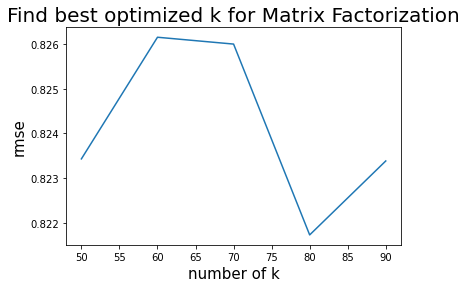

In [30]:
plt.plot(res.index, res.rmse)
plt.title("Find best optimized k for Matrix Factorization", fontsize=20)
plt.xlabel('number of k', fontsize=15)
plt.ylabel('rmse', fontsize=15)
plt.show()

----

## 파이썬 모듈 활용

- https://pypi.org/project/matrix-factorization/

In [31]:
from matrix_factorization import BaselineModel, KernelMF, train_update_test_split

In [32]:
path = './movielens_data/'
ratings_df = pd.read_csv(os.path.join(path, 'ratings.csv'), encoding='utf-8')

In [33]:
train_df, test_df = train_test_split(ratings_df, test_size=0.2, random_state=1234)

In [34]:
new_train_df = train_df
new_train_df = new_train_df.rename(columns={"userId": "user_id", "movieId": "item_id"})

In [35]:
new_train_df.head()

,user_id,item_id,rating,timestamp
95713,600,5943,3.0,1237714356
61560,407,2571,5.0,1424349171
77204,482,8958,4.0,1105397126
93367,599,2322,2.5,1498515283
90892,590,2959,3.5,1258416553


In [36]:
(
    X_train_initial,
    y_train_initial,
    X_train_update,
    y_train_update,
    X_test_update,
    y_test_update,
) = train_update_test_split(new_train_df, frac_new_users=0.2)

In [37]:
# Initial training
matrix_fact = KernelMF(n_epochs=20, n_factors=100, verbose=1, lr=0.001, reg=0.005)
matrix_fact.fit(X_train_initial, y_train_initial)

Epoch  1 / 20  -  train_rmse: 0.9838561538502848
Epoch  2 / 20  -  train_rmse: 0.9584940068561788
Epoch  3 / 20  -  train_rmse: 0.9415177912136495
Epoch  4 / 20  -  train_rmse: 0.9287819448430154
Epoch  5 / 20  -  train_rmse: 0.9186170828454041
Epoch  6 / 20  -  train_rmse: 0.9100963268360494
Epoch  7 / 20  -  train_rmse: 0.9027442788739897
Epoch  8 / 20  -  train_rmse: 0.8962256105111657
Epoch  9 / 20  -  train_rmse: 0.8903267755340698
Epoch  10 / 20  -  train_rmse: 0.8849302847653001
Epoch  11 / 20  -  train_rmse: 0.8799161333746948
Epoch  12 / 20  -  train_rmse: 0.8752377246367582
Epoch  13 / 20  -  train_rmse: 0.8708016214064271
Epoch  14 / 20  -  train_rmse: 0.8665898609534508
Epoch  15 / 20  -  train_rmse: 0.8625711965282181
Epoch  16 / 20  -  train_rmse: 0.8587132927763873
Epoch  17 / 20  -  train_rmse: 0.8549944135518643
Epoch  18 / 20  -  train_rmse: 0.8513918938565559
Epoch  19 / 20  -  train_rmse: 0.847885197766513
Epoch  20 / 20  -  train_rmse: 0.8444766009255669


KernelMF(gamma=0.01, lr=0.001, n_epochs=20, reg=0.005)

In [38]:
# Update model with new users
matrix_fact.update_users(
    X_train_update, y_train_update, lr=0.001, n_epochs=20, verbose=1
)

Epoch  1 / 20  -  train_rmse: 0.993389944290464
Epoch  2 / 20  -  train_rmse: 0.9754309886640019
Epoch  3 / 20  -  train_rmse: 0.9634773808049899
Epoch  4 / 20  -  train_rmse: 0.9547329151749651
Epoch  5 / 20  -  train_rmse: 0.94790567427708
Epoch  6 / 20  -  train_rmse: 0.9423837691606252
Epoch  7 / 20  -  train_rmse: 0.9376925818999285
Epoch  8 / 20  -  train_rmse: 0.9335912213453005
Epoch  9 / 20  -  train_rmse: 0.9299767279490104
Epoch  10 / 20  -  train_rmse: 0.9267376410445661
Epoch  11 / 20  -  train_rmse: 0.9238068116637818
Epoch  12 / 20  -  train_rmse: 0.9211369635976472
Epoch  13 / 20  -  train_rmse: 0.9186809511612738
Epoch  14 / 20  -  train_rmse: 0.916416111426223
Epoch  15 / 20  -  train_rmse: 0.9143105962910141
Epoch  16 / 20  -  train_rmse: 0.9123453210295752
Epoch  17 / 20  -  train_rmse: 0.910499810914435
Epoch  18 / 20  -  train_rmse: 0.90876000433241
Epoch  19 / 20  -  train_rmse: 0.9071158110374826
Epoch  20 / 20  -  train_rmse: 0.9055510795670793


In [39]:
pred = matrix_fact.predict(X_test_update)
rmse = mean_squared_error(y_test_update, pred, squared=False)

In [40]:
print(f"\nTest RMSE: {rmse:.4f}")


Test RMSE: 0.9238


In [41]:
# Get recommendations
user = 200
items_known = X_train_initial.query("user_id == @user")["item_id"]
matrix_fact.recommend(user=user, items_known=items_known)

,user_id,item_id,rating_pred
910,200,50,4.614365
73,200,260,4.598019
206,200,1196,4.512514
821,200,527,4.427108
222,200,1210,4.397013
617,200,912,4.390194
506,200,858,4.375480
599,200,1136,4.359283
549,200,1222,4.354566
26,200,2028,4.351996


### SGD

In [42]:
baseline_model = BaselineModel(method='sgd', n_epochs = 20, reg = 0.005, lr = 0.01, verbose=1)
baseline_model.fit(X_train_initial, y_train_initial)

pred = baseline_model.predict(X_test_update)
rmse = mean_squared_error(y_test_update, pred, squared = False)

Epoch  1 / 20  -  train_rmse: 0.8972904115391654
Epoch  2 / 20  -  train_rmse: 0.8728531376399271
Epoch  3 / 20  -  train_rmse: 0.8591347421527487
Epoch  4 / 20  -  train_rmse: 0.8485484545810086
Epoch  5 / 20  -  train_rmse: 0.8414160180242461
Epoch  6 / 20  -  train_rmse: 0.8349286695108624
Epoch  7 / 20  -  train_rmse: 0.8298229700371075
Epoch  8 / 20  -  train_rmse: 0.8255719211080383
Epoch  9 / 20  -  train_rmse: 0.8220601751920639
Epoch  10 / 20  -  train_rmse: 0.8187268303681541
Epoch  11 / 20  -  train_rmse: 0.8156174960955311
Epoch  12 / 20  -  train_rmse: 0.813255998783608
Epoch  13 / 20  -  train_rmse: 0.811171845958389
Epoch  14 / 20  -  train_rmse: 0.8085037831525604
Epoch  15 / 20  -  train_rmse: 0.8065463502716884
Epoch  16 / 20  -  train_rmse: 0.8047204210113502
Epoch  17 / 20  -  train_rmse: 0.8029051415644463
Epoch  18 / 20  -  train_rmse: 0.8017316057184118
Epoch  19 / 20  -  train_rmse: 0.7999319338080472
Epoch  20 / 20  -  train_rmse: 0.7986094027951182


In [43]:
print(f'\nTest RMSE: {rmse:.4f}')


Test RMSE: 1.0015


In [44]:
baseline_model.update_users(X_train_update, y_train_update, n_epochs=20, lr=0.001, verbose=1)
pred = baseline_model.predict(X_test_update)
rmse = mean_squared_error(y_test_update, pred, squared = False)

Epoch  1 / 20  -  train_rmse: 0.9696060995598316
Epoch  2 / 20  -  train_rmse: 0.9504719853247792
Epoch  3 / 20  -  train_rmse: 0.9381513709017493
Epoch  4 / 20  -  train_rmse: 0.9295728405399425
Epoch  5 / 20  -  train_rmse: 0.9231726410885738
Epoch  6 / 20  -  train_rmse: 0.9182177413558404
Epoch  7 / 20  -  train_rmse: 0.9142147838070057
Epoch  8 / 20  -  train_rmse: 0.9108673598206573
Epoch  9 / 20  -  train_rmse: 0.9080428585834647
Epoch  10 / 20  -  train_rmse: 0.9056120211656883
Epoch  11 / 20  -  train_rmse: 0.9035099454085528
Epoch  12 / 20  -  train_rmse: 0.9016753338285256
Epoch  13 / 20  -  train_rmse: 0.9000672491422098
Epoch  14 / 20  -  train_rmse: 0.8986487765151343
Epoch  15 / 20  -  train_rmse: 0.897393610817989
Epoch  16 / 20  -  train_rmse: 0.8962796193523216
Epoch  17 / 20  -  train_rmse: 0.8952836057292062
Epoch  18 / 20  -  train_rmse: 0.8943925019250342
Epoch  19 / 20  -  train_rmse: 0.8935903479949915
Epoch  20 / 20  -  train_rmse: 0.892869210281891


In [45]:
print(f'\nTest RMSE: {rmse:.4f}')


Test RMSE: 0.9041


### ALS

In [46]:
baseline_model = BaselineModel(method='als', n_epochs = 20, reg = 0.5, verbose=1)
baseline_model.fit(X_train_initial, y_train_initial)

pred = baseline_model.predict(X_test_update)
rmse = mean_squared_error(y_test_update, pred, squared = False)

Epoch  1 / 20  -  train_rmse: 0.7859544331362794
Epoch  2 / 20  -  train_rmse: 0.7690591872304171
Epoch  3 / 20  -  train_rmse: 0.7675037478983807
Epoch  4 / 20  -  train_rmse: 0.7672463401159156
Epoch  5 / 20  -  train_rmse: 0.7671731763247771
Epoch  6 / 20  -  train_rmse: 0.7671389942213624
Epoch  7 / 20  -  train_rmse: 0.7671157298776693
Epoch  8 / 20  -  train_rmse: 0.767096623276087
Epoch  9 / 20  -  train_rmse: 0.7670798063421082
Epoch  10 / 20  -  train_rmse: 0.7670646618488586
Epoch  11 / 20  -  train_rmse: 0.7670509168293277
Epoch  12 / 20  -  train_rmse: 0.7670384037493486
Epoch  13 / 20  -  train_rmse: 0.7670269944626485
Epoch  14 / 20  -  train_rmse: 0.7670165805755952
Epoch  15 / 20  -  train_rmse: 0.7670070667924676
Epoch  16 / 20  -  train_rmse: 0.7669983681100387
Epoch  17 / 20  -  train_rmse: 0.7669904082665154
Epoch  18 / 20  -  train_rmse: 0.7669831186652215
Epoch  19 / 20  -  train_rmse: 0.7669764375198915
Epoch  20 / 20  -  train_rmse: 0.7669703091300908


In [47]:
print(f'\nTest RMSE: {rmse:.4f}')


Test RMSE: 1.0065
